In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
netfilx_caps = pd.read_csv('..\\data\\Netflix_Movie_Data.xls',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])

In [3]:
netfilx_caps 

,Cust_Id,Rating
0,1,2003.0
1,2,2004.0
2,3,1997.0
3,4,1994.0
4,5,2004.0
...,...,...
17764,17766,2002.0
17765,17767,2004.0
17766,17768,2000.0
17767,17769,2003.0


In [41]:
# How many total movies are there in the given data ?
movie_count= netfilx_caps.isnull().sum()["Rating"]
movie_count

4499

In [45]:
# How many total unique Customer are there in the given data ?
cust_count = netfilx_caps["Cust_Id"].nunique()
cust_count = cust_count- movie_count
cust_count

470758

In [51]:
# get the total number of ratings given by the customers
rating_count= netfilx_caps["Cust_Id"].count()-movie_count # In Customer id column we will remove movie id to get how many total rating are there
rating_count 

24053764

In [53]:
# To find out how many people have rated the movies as 1,2,3,4,5 stars ratings to the movies
stars= netfilx_caps .groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


NameError: name 'customer_count' is not defined

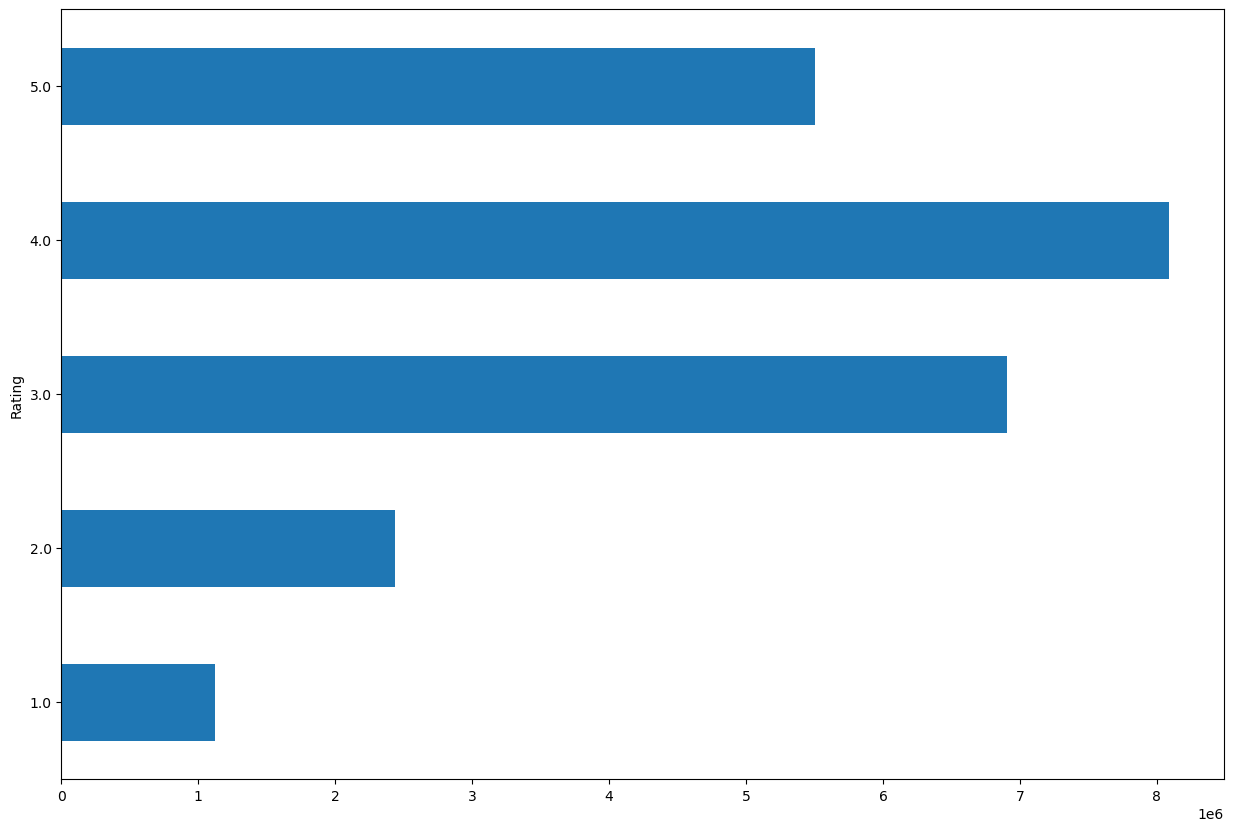

In [57]:
ax=stars.plot(kind='barh', legend=False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.grid(True)

In [59]:
# Lets just make a clear dataframe to find how many MovieId are there
movie_id=None 
movie_np =[]
# Iterate over the DataFrame rows
for cust_id in netfilx_caps ['Cust_Id']:
    if ':' in cust_id:
      # Update the current movie ID
      movie_id = int(cust_id.replace(':', ''))
    movie_np.append(movie_id)

In [60]:
movie_np

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [63]:
# Add the new column to the DataFrame
netfilx_caps ['Movie_Id'] = movie_np

In [64]:
netfilx_caps 

,Cust_Id,Rating,Movie_Id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [67]:
netfilx_caps .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   object 
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 550.7+ MB


In [69]:
netfilx_caps = netfilx_caps [netfilx_caps ['Rating'].notna()]

In [71]:
netfilx_caps ["Cust_Id"]= netfilx_caps ["Cust_Id"].astype(int)


C:\Users\DELL\AppData\Local\Temp\ipykernel_16304\3880520777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netfilx_caps ["Cust_Id"]= netfilx_caps ["Cust_Id"].astype(int)


In [72]:
netfilx_caps.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Cust_Id   int32  
 1   Rating    float64
 2   Movie_Id  int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 642.3 MB


In [75]:
netfilx_caps 

,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


# pre-filtering
# now we will remove all the users that have rated less movies 
# also all those movies that has been rated less in numbers

In [77]:
dataset_movie_summary= netfilx_caps .groupby('Movie_Id')['Rating'].agg(["count"])
dataset_movie_summary


,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [79]:
#now we will create a benchmark
movie_benchmark = round(dataset_movie_summary['count'].quantile(0.6),0)
movie_benchmark

908.0

In [81]:
drop_movie_list = dataset_movie_summary[dataset_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=2699)

In [83]:
len(drop_movie_list)

2699

In [85]:
#now we will remove all the users that are in-active
dataset_cust_summary = netfilx_caps .groupby('Cust_Id')['Rating'].agg(["count"])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [87]:
cust_benchmark = round(dataset_cust_summary['count'].quantile(0.6),0)
cust_benchmark

36.0

In [89]:
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int32', name='Cust_Id', length=282042)

In [91]:
len(drop_cust_list)

282042

In [98]:
# ~ means considering everything excluding this (drop_movie_list) (drop_cust_list)
netfilx_caps =netfilx_caps[~netfilx_caps['Movie_Id'].isin(drop_movie_list)]
netfilx_caps = netfilx_caps [~netfilx_caps['Cust_Id'].isin(drop_cust_list)]
print('After the triming, the shape is: {}'.format(netfilx_caps.shape))

After the triming, the shape is: (19695836, 3)


In [100]:
netfilx_caps 

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


# # Model Bulding

In [102]:
df_title = pd.read_csv('NetflixMovieData.csv',encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])

In [104]:
df_title

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [128]:
!pip install --upgrade pip setuptools

  Using cached setuptools-75.8.0-py3-none-any.whl.metadata (6.7 kB)
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 445.2 kB/s eta 0:00:05
    --------------------------------------- 0.0/1.8 MB 393.8 kB/s eta 0:00:05
   -- ------------------------------------- 0.1/1.8 MB 819.2 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.8 MB 602.4 kB/s eta 0:00:03
   --- ------------------------------------ 0.2/1.8 MB 807.1 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.8 MB 692.4 kB/s eta 0:00:03
   ------ --------------------------------- 0.3/1.8 MB 853.3 kB/s eta 0:00:02
   ------ --------------------------------- 0.3/1.8 MB 855.7 kB/s eta 0:00:02
   -------- ------------------------------- 0.4/1.8 MB 933.2 kB/s eta 0:00:02
   --------- ----------

ERROR: To modify pip, please run the following command:
C:\Users\DELL\anaconda3\python.exe -m pip install --upgrade pip setuptools


In [130]:
!pip install scikit-surprise

  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-surprise


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [115 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-312\surprise
  copying surprise\accuracy.py -> build\lib.win-amd64-cpython-312\surprise
  copying surprise\builtin_datasets.py -> build\lib.win-amd64-cpython-312\surprise
  copying surprise\dataset.py -> build\lib.win-amd64-cpython-312\surprise
  copying surprise\dump.py -> build\lib.win-amd64-cpython-312\surprise
  copying surprise\reader.py -> build\lib.win-amd64-cpython-312\surprise
  copying surprise\trainset.py -> build\lib.win-amd64-cpython-312\surprise
  copying surprise\utils.py -> build\lib.win-amd64-cpython-312\surprise
  copying surprise\__init__.py -> build\lib.win-amd64-cpython-312\surprise
  copying surprise\__main__.py -> build\lib.win-amd64-cpython-312\surprise
  creating build\lib.win-amd64-cpython-312\surprise\model_selection
  copying surprise\model_selection\search.py -> build\lib.win-amd64

In [134]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

ModuleNotFoundError: No module named 'surprise'

In [ ]:
reader = Reader()

In [ ]:
# buliding model for first 100k records for quick runtime
data = Dataset.load_from_df(netflix_dataset[['Cust_Id', 'Movie_Id', 'Rating']][:100000], reader)

In [ ]:
data

In [ ]:
# creating a SVD model
model = SVD()

In [ ]:
cross_validate(model, data, measures=['RMSE'], cv=3)   # training SVD model

# # Recomadations

In [1]:
# filtering the data for a specific user to whom we are going to suggest the movies
user_1331154=netflix_dataset[netflix_dataset['Cust_Id']==1331154]
user_1331154

NameError: name 'netflix_dataset' is not defined

In [3]:
user_1331154=user_1331154[~user_1331154['Movie_Id'].isin(drop_movie_list)]
user_1331154

NameError: name 'user_1331154' is not defined

In [ ]:
# prediction part
user_1331154["Estimated_Score"] = user_1331154["Movie_Id"].apply(lambda x: model.predict(1331154, x).est)

In [ ]:
user_1331154

In [ ]:
# Display top 5 movies with highest estimated score that user 1331154 may like
user_1331154.sort_values('Estimated_Score', ascending=False)

In [ ]:
user_1331154.sort_values('Estimated_Score', ascending=False).head(5)

In [131]:
!pip install scikit-surprise

  Using cached scikit_surprise-1.1.4.tar.gz (154 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build scikit-surprise


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [115 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-312\surprise
  copying surprise\accuracy.py -> build\lib.win-amd64-cpython-312\surprise
  copying surprise\builtin_datasets.py -> build\lib.win-amd64-cpython-312\surprise
  copying surprise\dataset.py -> build\lib.win-amd64-cpython-312\surprise
  copying surprise\dump.py -> build\lib.win-amd64-cpython-312\surprise
  copying surprise\reader.py -> build\lib.win-amd64-cpython-312\surprise
  copying surprise\trainset.py -> build\lib.win-amd64-cpython-312\surprise
  copying surprise\utils.py -> build\lib.win-amd64-cpython-312\surprise
  copying surprise\__init__.py -> build\lib.win-amd64-cpython-312\surprise
  copying surprise\__main__.py -> build\lib.win-amd64-cpython-312\surprise
  creating build\lib.win-amd64-cpython-312\surprise\model_selection
  copying surprise\model_selection\search.py -> build\lib.win-amd64